# K-Means Clustering

**overview**<br>
There is an online retail company that sells unique all-occasion gifts.
Many customers of the company are wholesalers. Find the best set of customers among all customers

In [2]:
# importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data 
from sklearn.preprocessing import scale

# To perform KMeans cluterring
from sklearn.cluster import KMeans

# To perform KMeans clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


### Study the Kmeans algo from the help

In [3]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (row

### Reading the Data Set

In [4]:
#reading Dataset
retail_trxns = pd.read_csv("Online_Retail_Store.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)

# parse date
retail_trxns['InvoiceDate'] = pd.to_datetime(retail_trxns['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [5]:
retail_trxns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Data quality check and  cleaning


In [6]:
# Browser the data
retail_trxns.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# Study data Structure
retail_trxns.shape

(541909, 8)

In [8]:
retail_trxns.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
retail_trxns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# Pre processing
# NaN Handling
retail_trxns.isnull().values.any()
retail_trxns.isnull().values.sum()
retail_trxns.isnull().sum()*100/retail_trxns.shape[0]

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [11]:
# droping the na records
no_NAs = retail_trxns.dropna()


In [12]:
# verify the null values
no_NAs.shape
no_NAs.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Let us do RFM analysis -  R(Recency), F(Frequency), M(Monetary)
#### RFM analysis

#### In RFM analysis, focuses on the recency, frequency and the monetary scores of all the customers for segmentation.
#### Recency: It measures how recently you visited the store or made a purchase
#### Frequency: It measures the frequency of the transactions the customers made
#### Monetary: It measures how much the customer spent on purchases he/she made

In [13]:
# RFM implementation

# Extracting amount by multiplying quantity and unit price and saving the data into amount variable.
amount  = pd.DataFrame(no_NAs.Quantity * no_NAs.UnitPrice, columns = ["Amount"])
amount.head(10)

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
5,15.30
6,25.50
7,11.10
8,11.10
9,54.08


### Monetary Value

In [14]:
#merging amount in order_wise
no_NAs = pd.concat(objs = [no_NAs, amount], axis = 1, ignore_index = False)

#Monetary Function
# Finding total amount spent per customer
monetary = no_NAs.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### if in the above result you get a column with name level_1, uncomment the below code and run it , else ignore it and keeping moving.

### Frequency Value

In [17]:
# Frequency function
frequency = no_NAs[['CustomerID','InvoiceNo']]

In [20]:
# Getting the count of orders made by each customer based on customer ID.
k = frequency.groupby("CustomerID").InvoiceNo.count()
k = pd.DataFrame(k)
k = k.reset_index()
k.columns = ["CustomerID", "Frequency"]
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### Merging Amount Frequency columns

In [22]:
# Creating master dataset 
master=monetary.merge(k, on = 'CustomerID', how = 'inner')
master.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### Recency Value

In [23]:
recency = no_NAs[['CustomerID','InvoiceDate']]
maximum = max(recency.InvoiceDate)

In [25]:
# Generating recency function 
# Filtering data for customerid and invoice_date
recency = no_NAs[['CustomerID','InvoiceDate']]

# Finding max Data
maximum = max(recency.InvoiceDate)

# Adding one more day to the max data, so that the max date will have 1 as the diffrence and not zero.
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum- recency.InvoiceDate
recency.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [27]:
# recency by cutomerId
a = recency.groupby('CustomerID')


In [28]:
type(a)

pandas.core.groupby.generic.DataFrameGroupBy

In [29]:
a['diff'].min()

CustomerID
12346.0   326 days 02:33:00
12347.0     2 days 20:58:00
12348.0    75 days 23:37:00
12349.0    19 days 02:59:00
12350.0   310 days 20:49:00
                 ...       
18280.0   278 days 02:58:00
18281.0   181 days 01:57:00
18282.0     8 days 01:07:00
18283.0     4 days 00:48:00
18287.0    43 days 03:21:00
Name: diff, Length: 4372, dtype: timedelta64[ns]

In [37]:
# Dataframe merging by recency
df = pd.DataFrame(recency.groupby('CustomerID')['diff'].min())
df = df.reset_index()
df.columns = ['CustomerID','Recency']
df.head()

,CustomerID,Recency
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


### RFM combined DataFrame


In [38]:
# combining all recency, frequency and monetary parameters
RFM = k.merge(monetary, on = 'CustomerID')
RFM = RFM.merge(df, on='CustomerID')
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


### Outlier Treatment


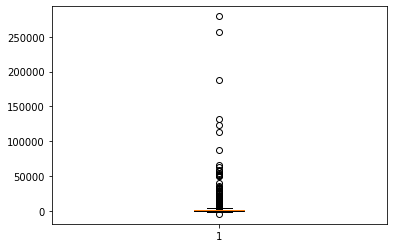

In [39]:
# outlier Treatment for Amount
plt.boxplot(RFM.Amount)
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >Q1-1.5*IQR) & (RFM.Amount<= Q3 + 1.5*IQR)]


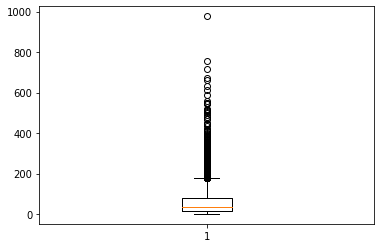

In [40]:
# outlier Treatment for Frequency
plt.boxplot(RFM.Frequency)
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 -Q1
RFM = RFM[(RFM.Frequency >= Q1- 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]


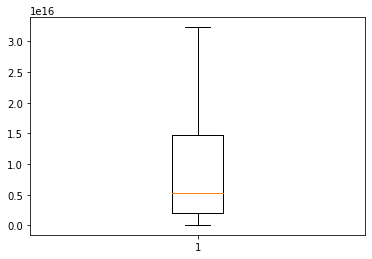

In [41]:
# outlier treatment for Recency
plt.boxplot(RFM.Recency)
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3-Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 +1.5*IQR)]

In [42]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00


### Scaling the RFM data

In [44]:
# standardise all parameters
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)


In [45]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.070949,-1.041614,2.136422
1,-0.375498,1.385298,-0.282050
2,0.631707,1.331702,-0.821629
3,-0.711233,-0.590055,1.982257
4,1.159290,1.045238,-0.657828


### Hopkins Statistics:
The Hopkins statistic, is a static which give a value which indicates the cluster tendency, in other words: how well the data can be clustered.
* if the value is between {0.01,...,0.3}, the data is regularly spaced.
* if the value is around 0.5, it is random.
* if the value is between {0.7,....,0.99}, it has high tendency to cluster.


In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import  numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1) .fit(X.values)
    
    rand_X = sample(range(0,n,1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist,_ =nbrs.kneighbors(uniform(np.amin(X, axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist,_= nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1),2,return_distance=True)
        wjd.append(w_dist[0][1])
    H = sum(ujd)/(sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H
    
                   

In [48]:
hopkins(RFM_norm1)

0.8892369228064164

### K-Means with some K


In [51]:
# Kmeans with K = 5
model_clus5 = KMeans(n_clusters = 7, max_iter =50)
model_clus5.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [55]:
from sklearn.metrics import silhouette_score
sse_ =[]
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])
    

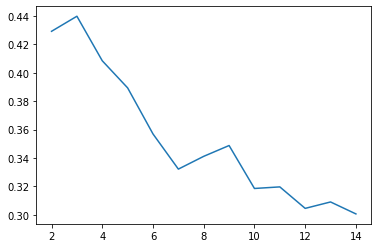

In [57]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);


### Sum of Squared Distances

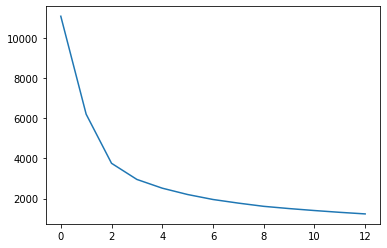

In [60]:
# sum of squared distance
ssd = []
for num_clusters in list(range(1,14)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)
plt.plot(ssd)

In [63]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis =1)
RFM_km.columns = ['CustomerID','Frequency','Amount', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [65]:
df = pd.concat([pd.Series([0,1,2,3,4,5,6]),km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean","Frequency_mean","Recency_mean"]
df.head(20)

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,315.222933,17.823280,46.730159
1,1,2567.689931,130.254545,37.487273
2,2,280.595442,18.660118,307.903733
3,3,800.724819,51.184885,43.813765
4,4,1767.366975,69.160763,50.929155
5,5,382.434889,23.270869,184.277683
6,6,873.464615,122.212454,54.853480


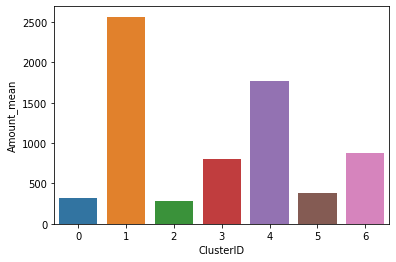

In [67]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

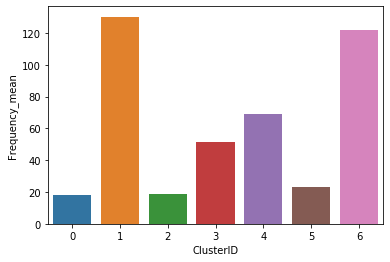

In [68]:
sns.barplot(x=df.ClusterID, y = df.Frequency_mean)

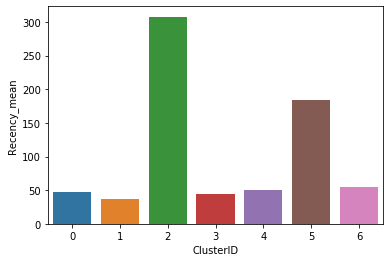

In [69]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

### Heirarchical Clustering

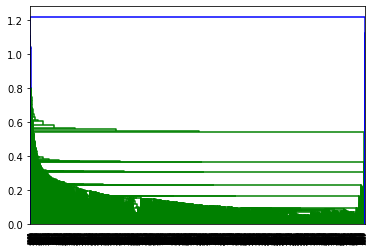

In [70]:
# heirarchical clustering
mergings = linkage(RFM_norm1,method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

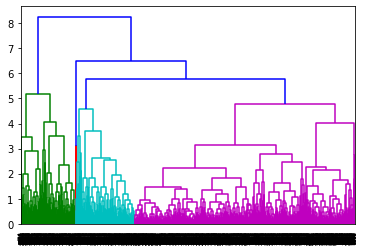

In [71]:
mergings = linkage(RFM_norm1, method = "complete",metric ='euclidean')
dendrogram(mergings)
plt.show()

In [88]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
RFM_hc = pd.concat([RFM, clusterCut], axis=1)
RFM_hc.columns = ['CutomerID','Frequency','Amount','Recency','ClusterID']


In [89]:
# summarie
RFM_hc.Recency = RFM_hc.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_hc.groupby(['ClusterID']).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_hc.groupby(["ClusterID"]).Recency.mean())

In [91]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount,km_clusters_frequency, km_clusters_recency], axis=1)
df.columns= ['ClusterID','Amount_mean','Frequency_mean','Recency_mean']
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,401.831170,23.929069,131.066011
1,1,1787.153319,44.943966,38.547414
2,2,2324.569366,122.145889,34.856764
3,3,915.359751,89.739875,65.752336
4,4,-997.147143,6.142857,218.285714


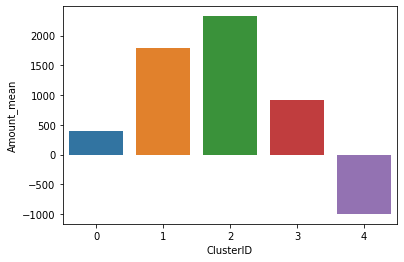

In [92]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

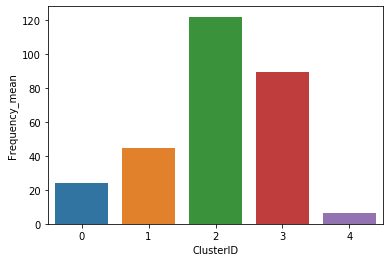

In [93]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

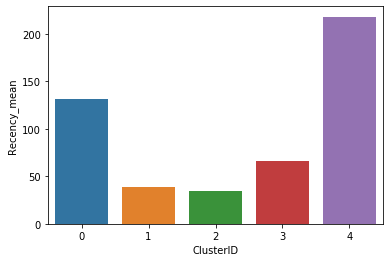

In [94]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)